# <p style="padding:10px;background-color:#9619EC;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Credit Card Fraud Detection</p>

<p style="text-align:center; ">
<img src="https://www.eastwestbank.com/content/dam/ewb-dotcom/reachfurther/newsarticlestore/519/Credit-card-fraud-top.jpg" style='width: 650px; height: 350px;'>
</p>

# <p style="padding:10px;background-color:#9619EC;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Датасет и его структура</p>


**Название и путь датасета: ```./data/creditcard.csv```.**

Название признаков анонимизированны.


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#9619EC;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Структура проекта (потенциальная)</p>

|No  | Contents                                                         |No  | Contents                                                      |
|:---|:-----------------------------------------------------------------|:---|:--------------------------------------------------------------|
|1   | [<font color="#682F2F"> Импорт необходимых библиотек</font>](#1) |7   | [<font color="#682F2F"> Углубленный EDA</font>](#7)           |
|2   | [<font color="#682F2F"> Информация о датасете</font>](#2)        |8   | [<font color="#682F2F"> Anomaly Detection</font>](#8)         |
|3   | [<font color="#682F2F"> Базовый EDA</font>](#3)                  |9  | [<font color="#682F2F"> Dimensionality Reduction?</font>](#9) |
|4   | [<font color="#682F2F"> Саммари по датасету</font>](#4)          |10  | [<font color="#682F2F"> Classification </font>](#10)          |
|5   | [<font color="#682F2F"> Data Preprocessing</font>](#5)           |11  | [<font color="#682F2F"> Testing </font>](#11)                 |
|6   | [<font color="#682F2F"> Визуальный анализ и выводы</font>](#6)   |12  | [<font color="#682F2F"> Summary</font>](#12)                  |

<a id="1"></a>
# <p style="padding:10px;background-color:#9619EC;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Импорт библиотек для проекта</p>

In [510]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# HINT!
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbalancedPipeline

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression	
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from utils import show_data_missings
from utils import read_data
from utils import print_basic_statistics
from utils import corr_feature_detect
from utils import plot_corr_matrix
from utils import ndarray_to_dataframe
from utils import outlier_detect_IQR
from utils import print_outlier_detect_summary
from utils import plot_explained_variance_ratio
from utils import plot_cumulative_explained_variance_ratio

from utils import basic_model_test
from utils import plot_roc_curve
from utils import plot_confusion_matrix

In [340]:
import importlib
imported_module = importlib.import_module('utils')
importlib.reload(imported_module);

In [341]:
random_state = 42


<a id="1"></a>
# <p style="padding:10px;background-color:#9619EC;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Базовый EDA и знакомство с датасетом</p>

In [342]:
data = read_data('./data/creditcard.csv')

print_basic_statistics(data, 'Class')

Shape = (284807, 31)

Columns = ['Time' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12'
 'V13' 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24'
 'V25' 'V26' 'V27' 'V28' 'Amount' 'Class']

First 15 samples:
    Time        V1        V2        V3        V4        V5        V6        V7        V8        V9  ...       V21       V22       V23       V24       V25       V26       V27       V28  Amount  Class
0    0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62      0
1    0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69      0
2    1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -

Классы несбалансированы!

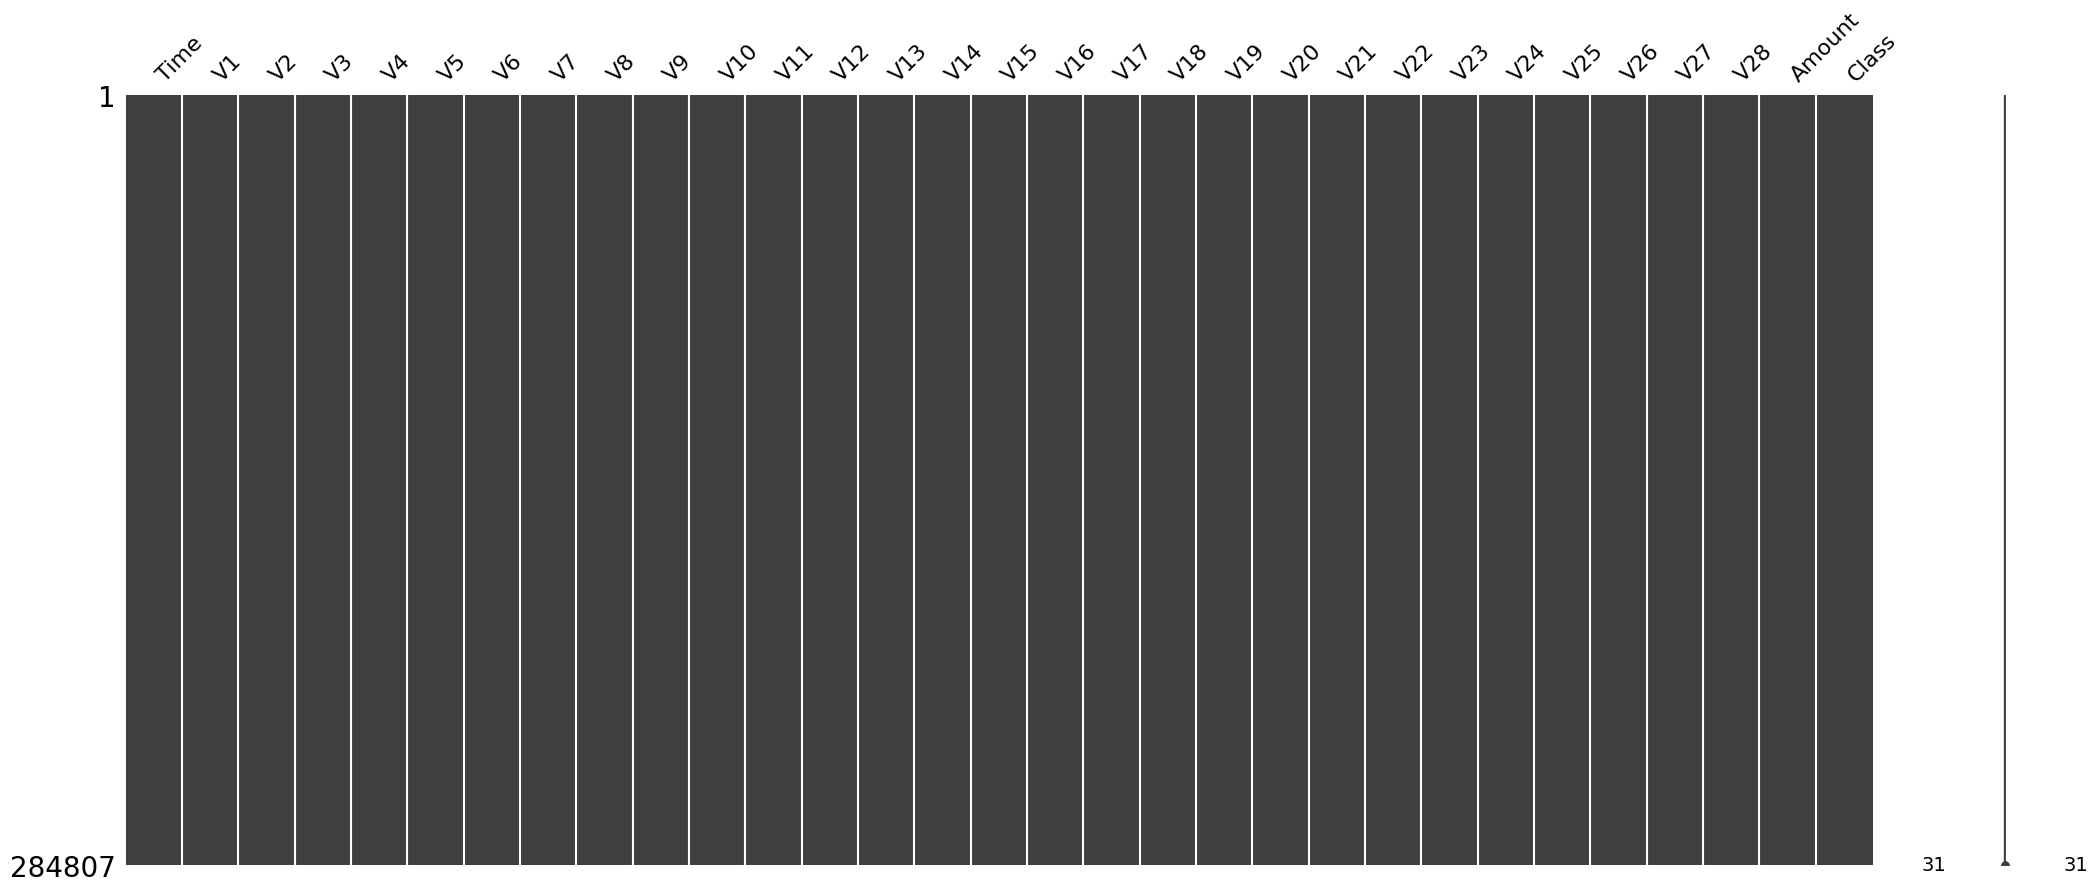

<Figure size 1500x900 with 0 Axes>

In [343]:
show_data_missings(data)

Пропусков в данных нет.

<a id="1"></a>
# <p style="padding:10px;background-color:#9619EC;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Preprocessing</p>

Делим данные на тренировочный и тестовый наборы.

In [390]:
X = data.drop('Class', axis=1)

In [391]:
y = data.Class

In [392]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15, random_state=random_state)

In [393]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

Т.к. наблюдений много и они несбалансированы было решено применить андерсэмплинг.<br>
Что должно как ускорить скорость обучения, т.к. больший класс будет сужен до количества наблюдений в меньшем, чтобы пропорция их в датасете была одинаковой.<br>
Так же это поможет моделям точнее обучаться в силу одинаковой представленности обоих классов после андерсэмплинга.

In [394]:
rm = RandomUnderSampler(random_state=random_state)

In [395]:
X_train_resampled, y_train_resampled = rm.fit_resample(X_train, y_train)

In [396]:
random_indices = np.random.permutation(len(X_train_resampled))

X_train_resampled = X_train_resampled.iloc[random_indices]
y_train_resampled = y_train_resampled.iloc[random_indices]

X_train_resampled.reset_index(drop=True, inplace=True)
y_train_resampled.reset_index(drop=True, inplace=True)

In [397]:
data_resampled = pd.concat([X_train_resampled, y_train_resampled], axis=1)

In [398]:
y_train_resampled

0      1
1      0
2      0
3      1
4      0
      ..
831    0
832    0
833    0
834    0
835    1
Name: Class, Length: 836, dtype: int64

In [399]:
data_resampled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,83934.0,-0.433222,2.428379,-3.996454,4.871299,-1.796308,-0.586868,-4.654543,1.285230,-2.743539,...,0.713559,-0.408954,-0.320890,-0.804230,0.962852,0.199558,1.094533,0.541148,1.00,1
1,168859.0,-1.168601,1.545468,-1.219628,-0.549771,0.552516,-0.916484,0.883008,-0.111038,0.873082,...,0.123054,0.891858,-0.069315,-0.516422,-0.115207,-0.127480,0.562485,0.475535,28.92,0
2,69045.0,0.107437,1.307280,-2.847355,1.675134,0.431290,-1.006558,1.552227,0.046751,-0.739100,...,0.004383,-0.252367,0.623448,-0.801249,-0.178970,-0.358752,0.049214,-0.034468,258.99,0
3,76575.0,-5.622469,3.480623,-6.200677,4.311234,-5.226286,-1.341764,-5.220941,2.682844,-2.921484,...,0.949569,-0.428986,-0.350676,0.197550,0.159234,-0.377791,-0.213562,0.459529,219.80,1
4,32763.0,-1.799417,-0.302873,1.778487,1.409281,-2.505616,0.598465,1.554174,0.401808,-0.465354,...,0.419817,0.281941,1.035148,0.647858,0.410086,-0.300525,-0.178321,0.071529,527.24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,39044.0,1.275578,0.156566,0.127243,0.377414,0.087112,-0.050286,-0.054447,0.004169,0.145466,...,-0.288367,-0.809771,0.065905,-0.780213,0.245998,0.177297,-0.015725,0.006476,1.98,0
832,123717.0,-6.493327,-5.964568,-0.220738,1.791232,3.798586,-3.537943,-1.646635,0.203844,0.170212,...,-0.197574,-1.133100,-1.953869,0.208528,0.379904,-0.626517,0.971170,-1.305610,187.43,0
833,38033.0,1.239792,0.667875,-0.237056,1.312187,0.026361,-1.198410,0.296270,-0.243775,-0.079760,...,-0.052087,-0.079580,-0.119029,0.276623,0.690952,-0.327545,0.031817,0.051232,1.00,0
834,125593.0,1.848225,-0.574866,-1.410532,0.332781,-0.091663,-0.490320,0.033487,-0.003523,0.624321,...,-0.170726,-0.706303,0.256791,0.723215,-0.316601,0.217830,-0.113392,-0.054725,94.52,0


In [400]:
y_train_resampled.value_counts()

Class
1    418
0    418
Name: count, dtype: int64

Видим, что оба класса представлены одинаковым количеством наблюдений.

Ищем коллинеарные признаки:

In [401]:
corr = corr_feature_detect(data=data_resampled, threshold=0.9)

print('Top correlations:\n')
for i in corr:
    print(i, '\n')

Top correlations:

  feature1 feature2      corr
0      V16      V17  0.946750
4      V16      V18  0.904608 

  feature1 feature2      corr
1      V17      V16  0.946750
2      V17      V18  0.943913 

  feature1 feature2      corr
3      V18      V17  0.943913
5      V18      V16  0.904608 



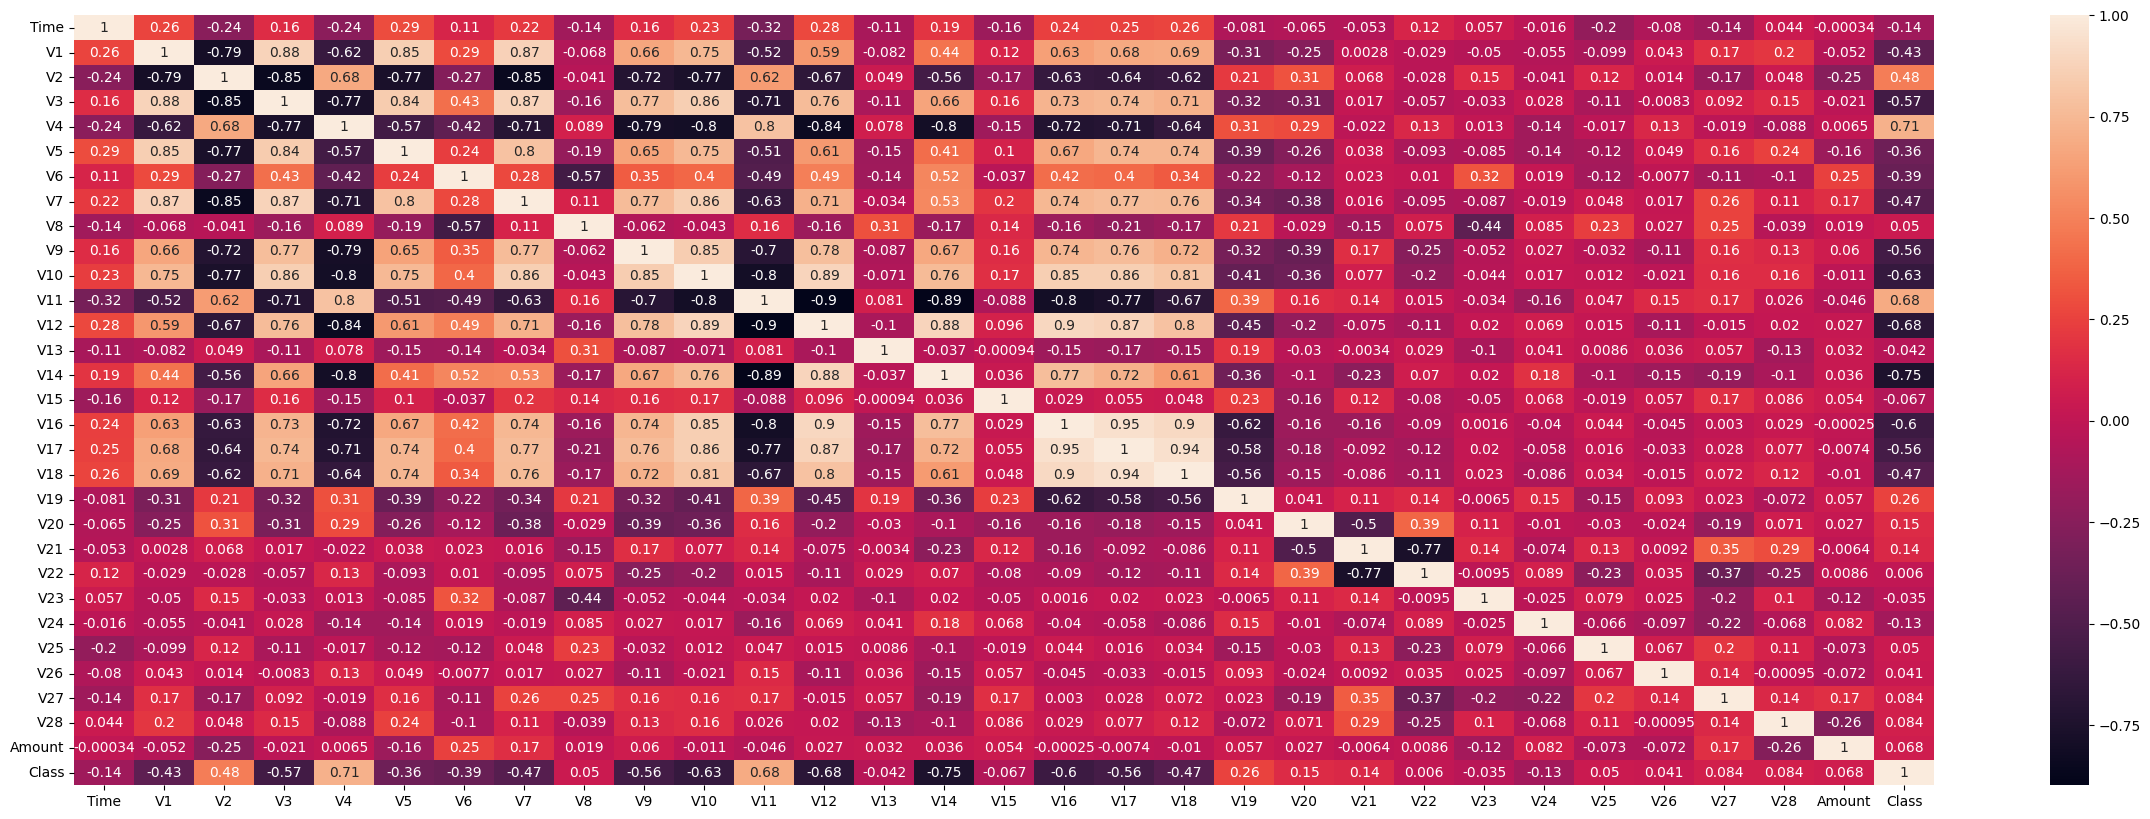

In [402]:
plot_corr_matrix(data_resampled, figsize=(30, 10))

Видим, что признаки V16, V17, V18 сильно между собой коррелируют. Оставляем только признак V16.

In [417]:
data_preprocessed = data.drop(['V17', 'V18'], axis=1)

data_resampled_preprocessed = data_resampled.drop(['V17', 'V18'], axis=1)

X_train_resampled_preprocessed = X_train_resampled.drop(['V17', 'V18'], axis=1)

X_train_preprocessed = X_train.drop(['V17', 'V18'], axis=1)

X_test_preprocessed = X_test.drop(['V17', 'V18'], axis=1)

Проводим повторную проверку:

In [418]:
corr = corr_feature_detect(data=data_resampled_preprocessed, threshold=0.9)

print('Top correlations:\n')
for i in corr:
    if (i['feature1'] == 'Class' or i['feature2'] == 'Class'):
        print(i, '\n')

Top correlations:



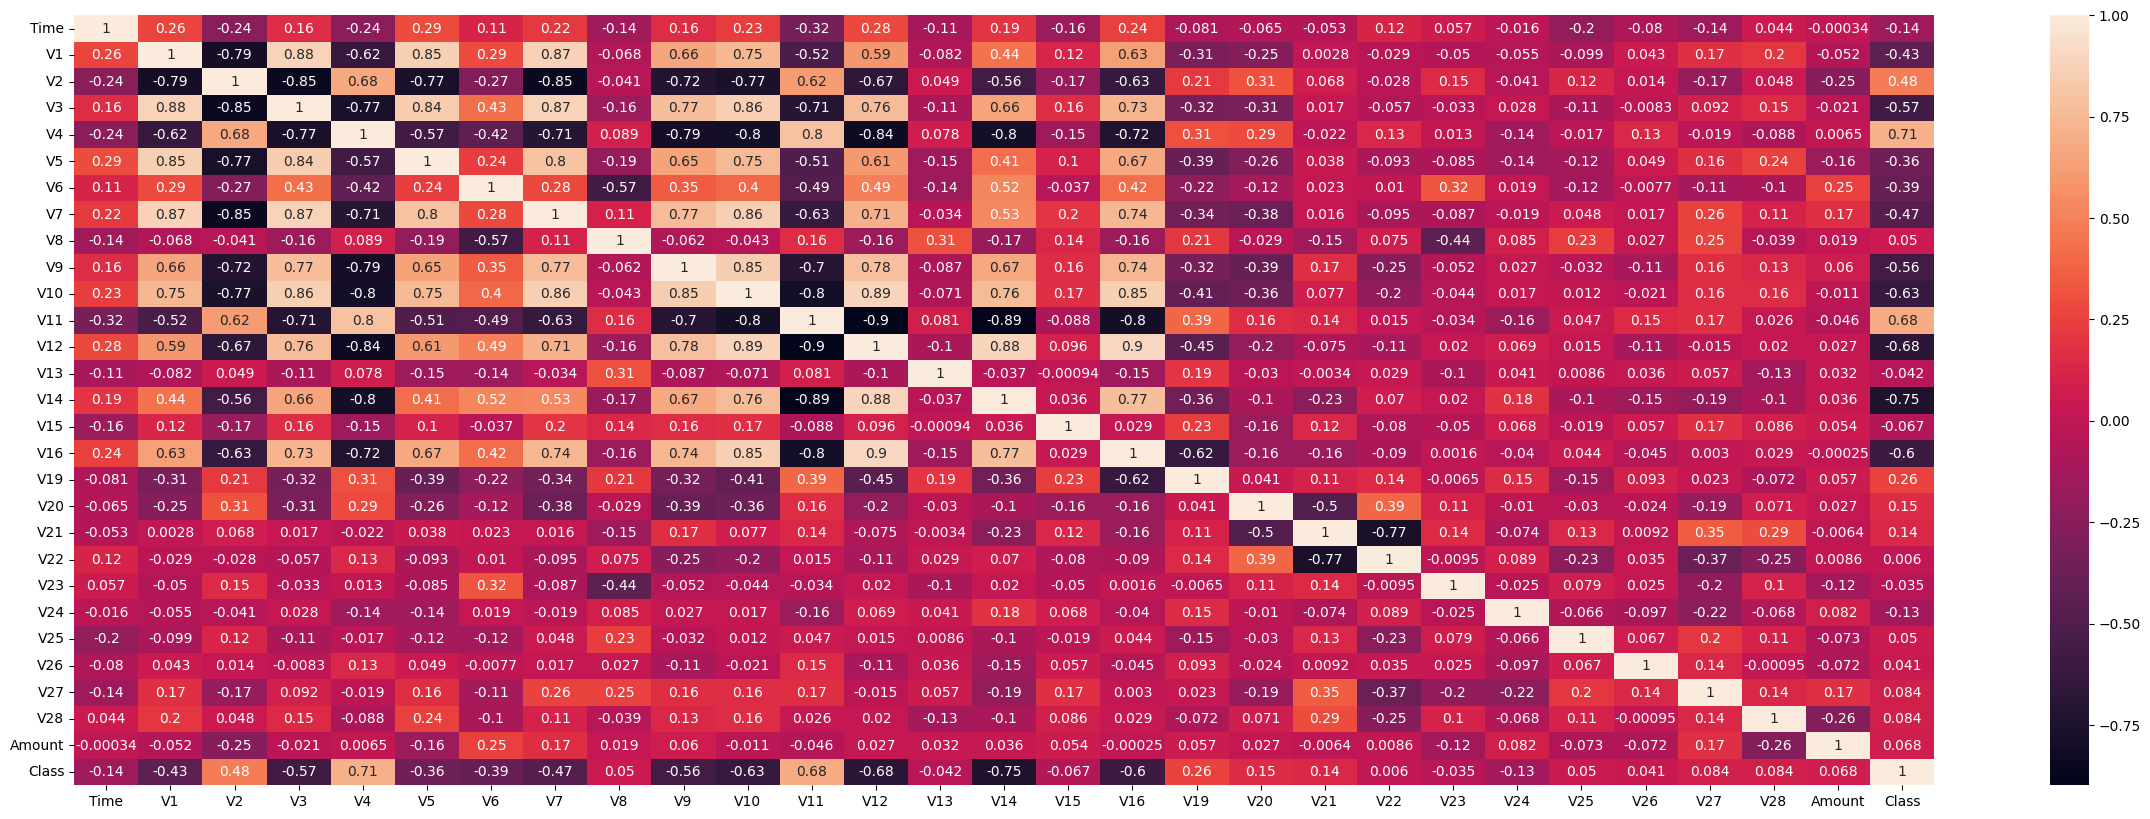

In [419]:
plot_corr_matrix(data_resampled_preprocessed, figsize=(30, 10))

Корреляций выше порога 0.9 не осталось.

Посмотрим на распределение данных по каждому признаку:

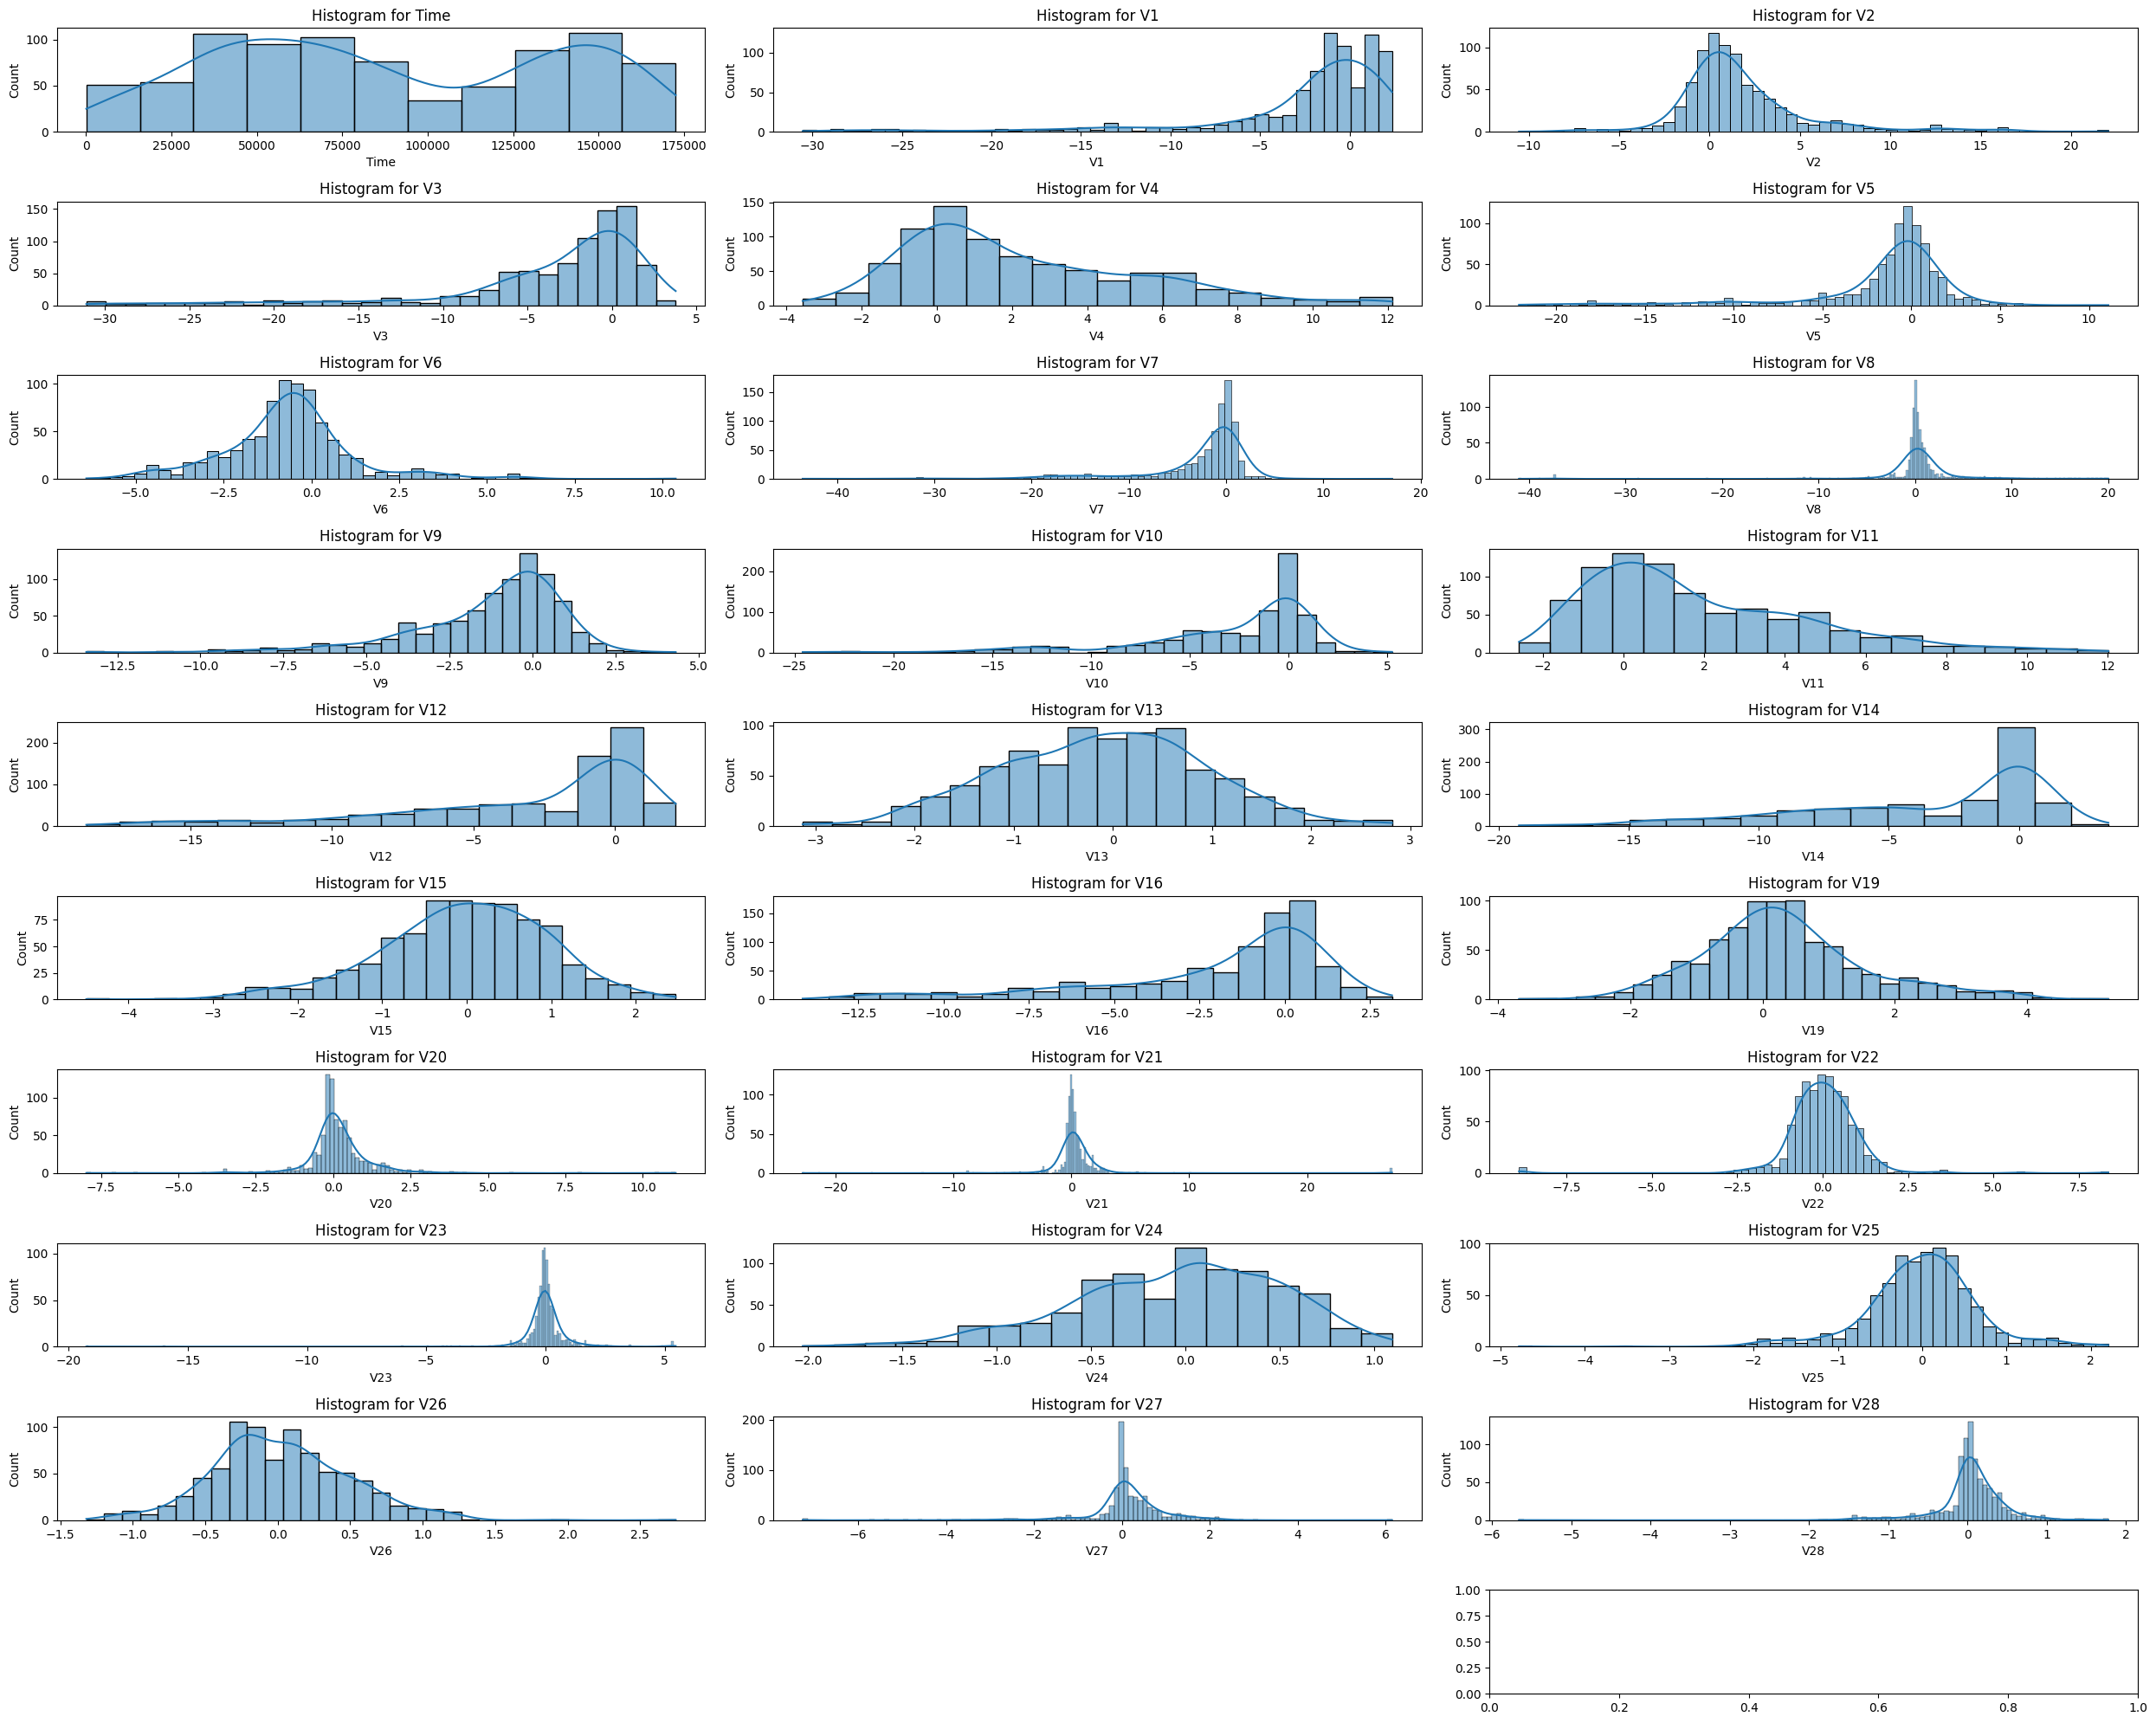

In [420]:
columns_to_plot = data_resampled_preprocessed.drop('Class', axis=1).columns

num_cols = 3
num_rows = (len(columns_to_plot) - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 20))

axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    sns.histplot(data=data_resampled_preprocessed, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f"Histogram for {col}")
    axes[i].set_xlabel(col)

if len(columns_to_plot) % num_cols != 0:
    for i in range(len(columns_to_plot) % num_cols, num_cols):
        fig.delaxes(axes[-i - 1])

plt.tight_layout()
plt.show()

Видим ярко выраженное бимодальное распределение по признак 'Time'.<br>
Применим для него логарифмическое преобразование.

In [421]:
data_preprocessed[data_preprocessed['Time'] == 0] = 1

data_resampled_preprocessed[data_resampled_preprocessed['Time'] == 0] = 1

X_train_resampled_preprocessed[X_train_resampled_preprocessed['Time'] == 0] = 1

X_train_preprocessed[X_train_preprocessed['Time'] == 0] = 1

X_test_preprocessed[X_test_preprocessed['Time'] == 0] = 1

In [422]:
data_preprocessed['Time'] = np.log10(data_preprocessed['Time'])

data_resampled_preprocessed['Time'] = np.log10(data_resampled_preprocessed['Time'])

X_train_resampled_preprocessed['Time'] = np.log10(X_train_resampled_preprocessed['Time'])

X_train_preprocessed['Time'] = np.log10(X_train_preprocessed['Time'])

X_test_preprocessed['Time'] = np.log10(X_test_preprocessed['Time'])

<Axes: xlabel='Time', ylabel='Count'>

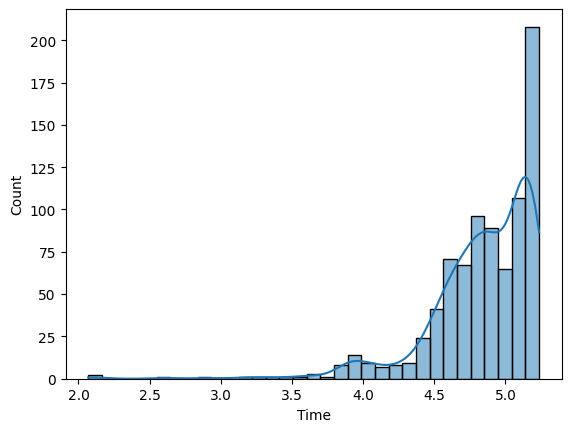

In [423]:
sns.histplot(data=data_resampled_preprocessed, x='Time', kde=True)

Масштабируем данные, что важно более эффективной работы моделей на основе расстояния.

In [424]:
rb = RobustScaler()

In [425]:
cols = X_train_resampled_preprocessed.columns

In [426]:
X_train_resampled_preprocessed = rb.fit_transform(X_train_resampled_preprocessed)
X_test_preprocessed = rb.transform(X_test_preprocessed)

In [427]:
data_resampled_preprocessed = pd.concat([ndarray_to_dataframe(X_train_resampled_preprocessed, columns=cols), ndarray_to_dataframe(y_train_resampled)], axis=1)

In [428]:
data_resampled_preprocessed

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
ID,,,,,,,,,,,,,,,,,,,,,
0,0.035354,0.117189,0.483099,-0.487765,0.812604,-0.596226,0.016472,-1.221894,1.033940,-0.826597,...,0.747237,-0.400837,-0.714762,-1.054250,1.312313,0.342414,2.015626,1.729584,-0.172683,1
1,0.686799,-0.083567,0.181756,0.015389,-0.441665,0.436697,-0.185679,0.476703,-0.294897,0.628269,...,-0.009228,0.823748,-0.116763,-0.688249,-0.224835,-0.205452,0.987303,1.502370,0.111007,0
2,-0.146624,0.264787,0.100461,-0.279551,0.073110,0.383386,-0.240920,0.681980,-0.144728,-0.020267,...,-0.161250,-0.253427,1.529948,-1.050459,-0.315752,-0.592886,-0.004729,-0.263745,2.448701,0
3,-0.050159,-1.299455,0.842237,-0.887164,0.683022,-2.104600,-0.446499,-1.395632,2.364059,-0.898180,...,1.049577,-0.419696,-0.785564,0.219698,0.166476,-0.624781,-0.512611,1.446942,2.050499,1
4,-0.841334,-0.255777,-0.449095,0.558640,0.011600,-0.908153,0.743427,0.682577,0.193182,0.089853,...,0.370940,0.249571,2.508567,0.792347,0.524152,-0.495342,-0.444498,0.103317,5.174334,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,-0.677884,0.583685,-0.292286,0.259439,-0.227142,0.232030,0.345553,0.189147,-0.185254,0.335569,...,-0.536277,-0.778167,0.204655,-1.023708,0.290188,0.305121,-0.130239,-0.121957,-0.162725,0
832,0.396908,-1.537196,-2.381469,0.196385,0.099971,1.864195,-1.793396,-0.299244,0.004778,0.345524,...,-0.419966,-1.082549,-4.596386,0.233659,0.481118,-1.041456,1.777195,-4.665645,1.721594,0
833,-0.702333,0.573915,-0.117772,0.193429,-0.010865,0.205314,-0.358581,0.296726,-0.421224,0.244967,...,-0.233591,-0.090765,-0.234936,0.320254,0.924626,-0.540608,-0.038351,0.033031,-0.172683,0


<a id="1"></a>
# <p style="padding:10px;background-color:#9619EC;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Углубленный EDA</p>

Выделим признаки, которые более всего коррелируют с положительным классом. Порог установлен в 0.7

In [429]:
corr = corr_feature_detect(data=data_resampled_preprocessed, threshold=0.7)
columns_to_process = []

print('Top correlations with \'Class\':\n')
for i in corr:
    if (i['feature1'].unique()[0] == 'Class'):
        columns_to_process = i['feature2'].values
        print(i, '\n')

Top correlations with 'Class':

   feature1 feature2      corr
50    Class       V4  0.713931
62    Class      V14 -0.745330 



In [430]:
columns_to_process

array(['V4', 'V14'], dtype=object)

Признаки 'V4', 'V14' коррелируют с положительным классом сильнее остальных.<br>
Уберём выбросы для этих признаков, т.к. они влияют сильнее остальных и выбросы в них могут соответственно сильнее повлиять на способность модели к распознаванию положительного класса в итоге.

In [431]:
from utils import outlier_detect_IQR
from utils import print_outlier_detect_summary


outlier_index_global = pd.Series(False, index=range(y_train.size))

for index, value in enumerate(columns_to_process):
    print(f'Column-{value}')
    outlier_index, param = outlier_detect_IQR(data_resampled_preprocessed, value, 1.5)
    print_outlier_detect_summary(outlier_index)
    outlier_index_global |= outlier_index

Column-V4
Number of outliers:  15
Outlier share:  0.017942583732057416
Column-V14
Number of outliers:  7
Outlier share:  0.008373205741626795


In [432]:
outlier_index_global.sum()

22

In [433]:
data_resampled_preprocessed_no_outliers = data_resampled_preprocessed[~outlier_index_global]

/tmp/ipykernel_36152/1127815423.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [434]:
data_resampled_preprocessed.shape

(836, 29)

In [435]:
data_resampled_preprocessed_no_outliers.shape

(814, 29)

Таким образом, было убрано 22 выбросы.

<a id="1"></a>
# <p style="padding:10px;background-color:#9619EC;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Anomaly Detection EDA</p>

!HINT
Обратите внимание на несбаланисированность классов. Попробуйте те методики баланса классов, которые мы с вами прошли (например SMOTE).


### SMOTE Technique (Over-Sampling):
<a id="smote"></a>

<b>SMOTE</b> stands for Synthetic Minority Over-sampling Technique.  Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems". <br><br>


<b> Understanding SMOTE: </b>
<ul>
<li> <b> Solving the Class Imbalance: </b> SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class. </li>
<li><b>Location of the synthetic points: </b>   SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points. </li>
<li> <b>Final Effect:  </b> More information is retained since we didn't have to delete any rows unlike in random undersampling.</li>
<li><b> Accuracy || Time Tradeoff: </b> Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.</li>

</ul>

### Cross Validation Overfitting Mistake:
## Overfitting during Cross Validation:
If you want to undersample or oversample your data you should not do it before cross validating. Why because you will be directly influencing the validation set before implementing cross-validation causing a "data leakage" problem. <b>In the following section you will see amazing precision and recall scores but in reality our data is overfitting!</b>
### The Wrong Way:
<img src="https://www.marcoaltini.com/uploads/1/3/2/3/13234002/2639934.jpg?401"><br>

As mentioned previously, if we get the minority class ("Fraud") in our case, and create the synthetic points before cross validating we have a certain influence on the "validation set" of the cross validation process. Remember how cross validation works, let's assume we are splitting the data into 5 batches, 4/5 of the dataset will be the training set while 1/5 will be the validation set. The test set should not be touched! For that reason, we have to do the creation of synthetic datapoints "during" cross-validation and not before, just like below: <br>


### The Right Way:
<img src="https://www.marcoaltini.com/uploads/1/3/2/3/13234002/9101820.jpg?372"> <br>
As you see above, SMOTE occurs "during" cross validation and not "prior" to the cross validation process. Synthetic data are created only for the training set without affecting the validation set.

<a id="1"></a>
# <p style="padding:10px;background-color:#9619EC;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Dimensionality Reduction?</p>

In [463]:
X_train_resampled_preprocessed_no_outliers.shape

(814, 28)

In [461]:
n_components = X_train.shape[1]
kernel = 'rbf'
gamma = None
n_jobs = -1

kernelPCA = KernelPCA(n_components=X_train_resampled_preprocessed_no_outliers.shape[1], kernel=kernel, gamma=gamma, n_jobs=n_jobs, random_state=random_state)

kernelPCA.fit(X_train_resampled_preprocessed_no_outliers)

X_train_resampled_preprocessed_no_outliers_PCA = kernelPCA.transform(X_train_resampled_preprocessed_no_outliers)
X_test_preprocessed_PCA = kernelPCA.transform(X_test_preprocessed)

/home/alex/projects/ml/ml_hw/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KernelPCA was fitted with feature names



[0.26057372 0.09770064 0.06148844 0.0476119  0.04099201 0.03698564
 0.03597165 0.03202061 0.03096709 0.02994846 0.02912588 0.02718783
 0.02688041 0.02424068 0.02300165 0.02185956 0.02070856 0.01808841
 0.01739587 0.01711514 0.01528757 0.01451847 0.01313082 0.01252359
 0.01208825 0.01140075 0.01073907 0.0104473 ]


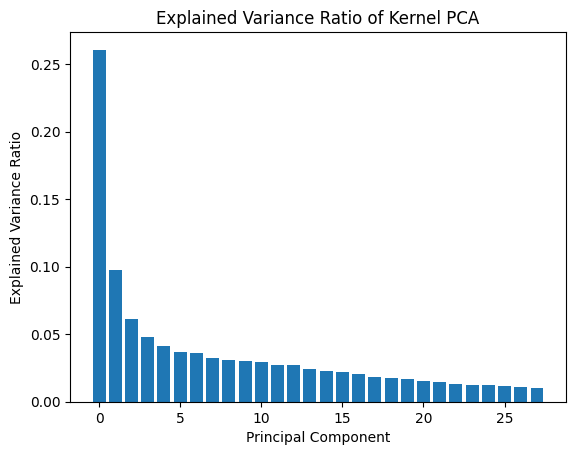

First 24 features explain enough variance for threshold 0.95: 0.9553246205102482


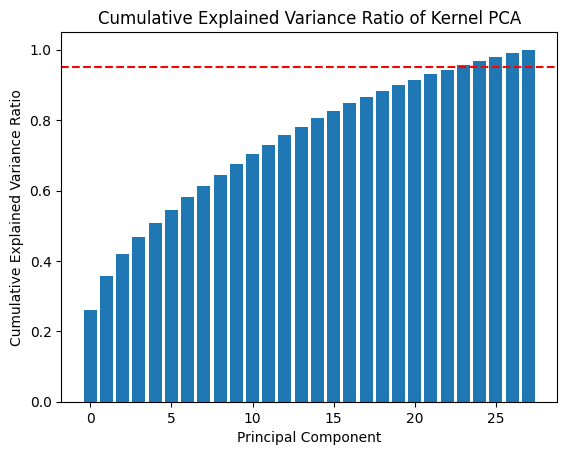

24

In [462]:
# Compute the eigenvalues of the kernel matrix
eigenvalues = kernelPCA.eigenvalues_

# Compute the explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

print(explained_variance_ratio)

plot_explained_variance_ratio(explained_variance_ratio, 'Kernel PCA')
plot_cumulative_explained_variance_ratio(explained_variance_ratio, 'Kernel PCA', 0.95)

In [464]:
n_components = X_train.shape[1]
kernel = 'rbf'
gamma = None
n_jobs = -1

kernelPCA = KernelPCA(n_components=24, kernel=kernel, gamma=gamma, n_jobs=n_jobs, random_state=random_state)

kernelPCA.fit(X_train_resampled_preprocessed_no_outliers)

X_train_resampled_preprocessed_no_outliers_PCA = kernelPCA.transform(X_train_resampled_preprocessed_no_outliers)
X_test_preprocessed_PCA = kernelPCA.transform(X_test_preprocessed)

/home/alex/projects/ml/ml_hw/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KernelPCA was fitted with feature names



<a id="1"></a>
# <p style="padding:10px;background-color:#9619EC;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Classification</p>

Базовый просмотр простых моделей.

In [469]:
def test_basic_models(x_train, x_test, y_train, y_test):
    models = [LogisticRegression(), RandomForestClassifier(), SVC(probability=True), KNeighborsClassifier()]

    for basic_model in models:
        print(basic_model.__class__.__name__)
        basic_model_test(
            basic_model, 
            x_train,
            x_test,
            y_train,
            y_test)
        plot_confusion_matrix(y_test, basic_model.predict(x_test))

LogisticRegression
ROC AUC:   0.949
Accuracy:  0.925
Precision: 0.020
Recall:    0.878
F1-score:  0.039
RandomForestClassifier
ROC AUC:   0.955
Accuracy:  0.915
Precision: 0.018
Recall:    0.919
F1-score:  0.036
SVC
ROC AUC:   0.952
Accuracy:  0.944
Precision: 0.027
Recall:    0.892
F1-score:  0.052
KNeighborsClassifier
ROC AUC:   0.954
Accuracy:  0.928
Precision: 0.020
Recall:    0.865
F1-score:  0.040


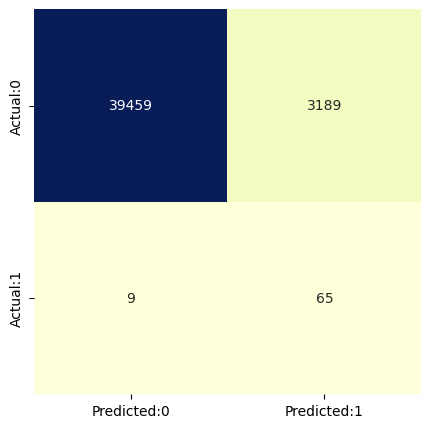

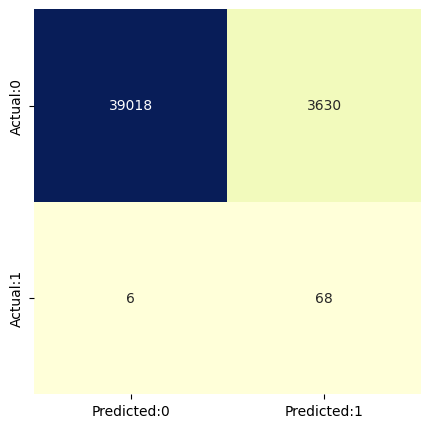

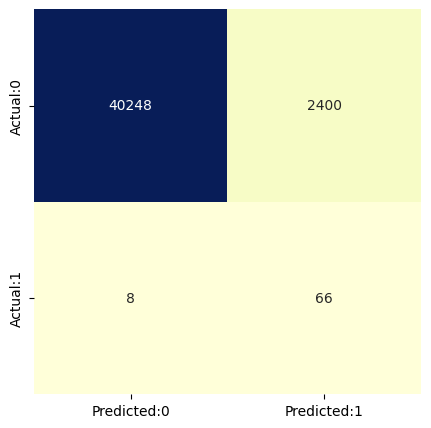

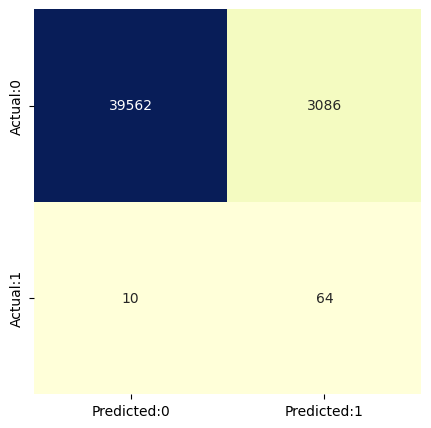

In [470]:
test_basic_models(X_train_resampled_preprocessed_no_outliers_PCA, X_test_preprocessed_PCA, y_train_resampled_no_outliers, y_test)

LogisticRegression
ROC AUC:   0.958
Accuracy:  0.974
Precision: 0.055
Recall:    0.865
F1-score:  0.104
RandomForestClassifier


/home/alex/projects/ml/ml_hw/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/home/alex/projects/ml/ml_hw/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/home/alex/projects/ml/ml_hw/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/home/alex/projects/ml/ml_hw/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/home/alex/projects/ml/ml_hw/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



ROC AUC:   0.968
Accuracy:  0.982
Precision: 0.079
Recall:    0.892
F1-score:  0.146


/home/alex/projects/ml/ml_hw/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



SVC


/home/alex/projects/ml/ml_hw/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names

/home/alex/projects/ml/ml_hw/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



ROC AUC:   0.965
Accuracy:  0.970
Precision: 0.048
Recall:    0.851
F1-score:  0.091


/home/alex/projects/ml/ml_hw/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



KNeighborsClassifier


/home/alex/projects/ml/ml_hw/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

/home/alex/projects/ml/ml_hw/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

/home/alex/projects/ml/ml_hw/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



ROC AUC:   0.952
Accuracy:  0.958
Precision: 0.034
Recall:    0.851
F1-score:  0.065


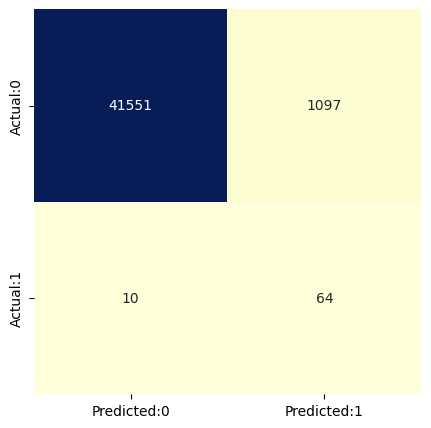

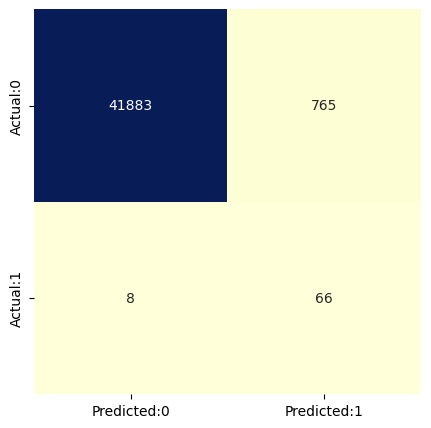

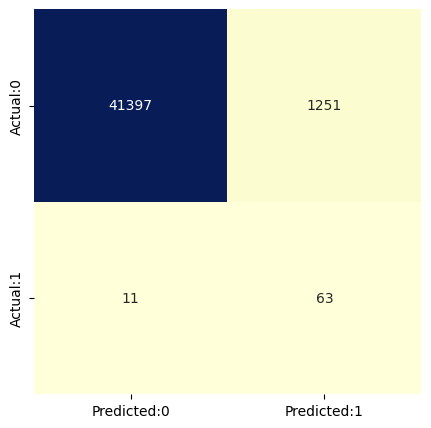

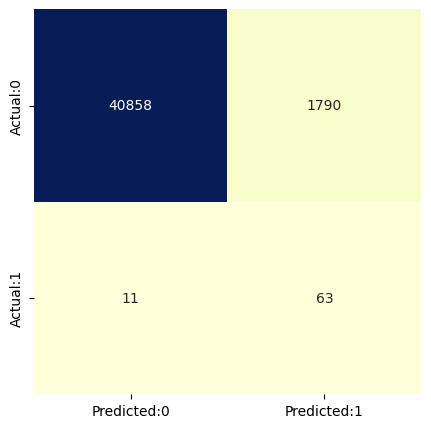

In [471]:
test_basic_models(X_train_resampled_preprocessed_no_outliers, X_test_preprocessed, y_train_resampled_no_outliers, y_test)

Попробуем найти наилучшие вариант каждой модели методом кросс валидации:

In [490]:
tree_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': range(2, 10),
    'min_samples_leaf': range(10, 13)
}

locally_best_forest = GridSearchCV(
    RandomForestClassifier(random_state=random_state), 
    tree_params,
    verbose=True, 
    n_jobs=-1, 
    cv=5,
    scoring='recall')

locally_best_forest.fit(X_train_resampled_preprocessed_no_outliers, y_train_resampled_no_outliers)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(2, 10),
                         'min_samples_leaf': range(10, 13),
                         'n_estimators': [100, 200, 500]},
             scoring='recall', verbose=True)

In [501]:
lr_params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000]
}

locally_best_lr = GridSearchCV(
    LogisticRegression(random_state=random_state), 
    lr_params,
    verbose=True, 
    n_jobs=-1, 
    cv=5,
    scoring='recall')

locally_best_lr.fit(X_train_resampled_preprocessed_no_outliers, y_train_resampled_no_outliers)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/home/alex/projects/ml/ml_hw/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alex/projects/ml/ml_hw/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='recall', verbose=True)

In [515]:
knn_params = {
    'n_neighbors': [5, 10, 15, 20]
}

locally_best_knn = GridSearchCV(
    KNeighborsClassifier(n_jobs=-1), 
    knn_params,
    verbose=True, 
    n_jobs=-1, 
    cv=5,
    scoring='recall')

locally_best_knn.fit(X_train_resampled_preprocessed_no_outliers, y_train_resampled_no_outliers)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 15, 20]}, scoring='recall',
             verbose=True)

In [520]:
svc_params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000],
    'degree': range(2, 5)
}

locally_best_svc = GridSearchCV(
    SVC(random_state=random_state, probability=True), 
    svc_params,
    verbose=True, 
    n_jobs=-1, 
    cv=5,
    scoring='recall')

locally_best_svc.fit(X_train_resampled_preprocessed_no_outliers, y_train_resampled_no_outliers)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000],
                         'degree': range(2, 5),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='recall', verbose=True)

Сравним результаты для них:

/home/alex/projects/ml/ml_hw/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/home/alex/projects/ml/ml_hw/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/home/alex/projects/ml/ml_hw/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

/home/alex/projects/ml/ml_hw/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



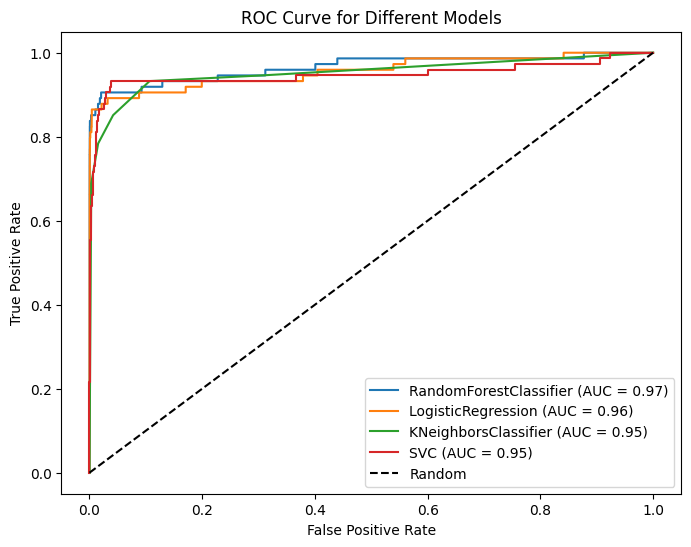

In [521]:
best_models = [locally_best_forest, locally_best_lr, locally_best_knn, locally_best_svc]

plt.figure(figsize=(8, 6))

for model in best_models:
    y_pred_prob = model.predict_proba(X_test_preprocessed)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{model.best_estimator_.__class__.__name__} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models')
plt.legend(loc='lower right')

plt.show()

RandomForest показывает лучший результат.

In [522]:
locally_best_forest.best_estimator_

RandomForestClassifier(max_depth=6, min_samples_leaf=11, n_estimators=200,
                       random_state=42)

In [491]:
print_basic_quality_metrics(y_test, locally_best_forest.predict(X_test_preprocessed), locally_best_forest.predict_proba(X_test_preprocessed))

/home/alex/projects/ml/ml_hw/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/home/alex/projects/ml/ml_hw/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



ROC AUC:   0.965
Accuracy:  0.989
Precision: 0.122
Recall:    0.865
F1-score:  0.214


/home/alex/projects/ml/ml_hw/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



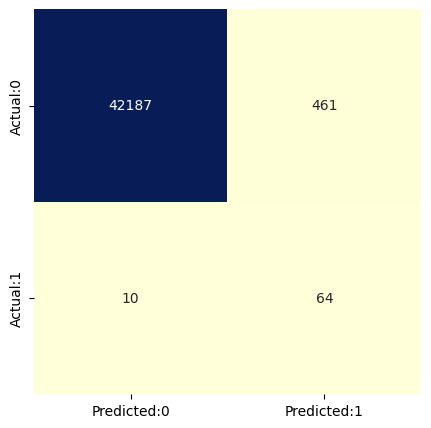

In [492]:
plot_confusion_matrix(y_test, locally_best_forest.predict(X_test_preprocessed))

In [523]:
def remove_corr_columns(df):
    return df.drop(['V17', 'V18'], axis=1)

def remove_outliers(df):
    corr = corr_feature_detect(data=df, threshold=0.6)
    columns_to_process = []

    for i in corr:
        if (i['feature1'].unique()[0] == 'Class'):
            columns_to_process = i['feature2'].values
    
    outlier_index_global = pd.Series(False, index=range(y_train.size))

    for _, value in enumerate(columns_to_process):
        outlier_index, param = outlier_detect_IQR(df, value, 2)
        outlier_index_global |= outlier_index
    
    return df[~outlier_index_global]

def update_time_column(df):
    df['Time'] = np.log10(df['Time'])
    return df


model = RandomForestClassifier()

imbalanced_pipeline = ImbalancedPipeline([
    ('columns_removal', FunctionTransformer(remove_corr_columns)),
    ('undersampling', RandomUnderSampler()),
    ('outlier_removal', FunctionTransformer(remove_outliers)),
    ('handle_bimodal_feature', FunctionTransformer(update_time_column)),
    ('scaling', RobustScaler()),
    ('model', model)
])

<a id="1"></a>
# <p style="padding:10px;background-color:#9619EC;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Testing</p>

<a id="1"></a>
# <p style="padding:10px;background-color:#9619EC;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Summary</p>